In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to generate a 3D stripe pattern
def generate_stripes(size, axis=0):
    data = np.zeros((size, size, size), dtype=np.float32)
    step = 2  # Width of stripes
    if axis == 0:  # Stripes along x-axis
        data[::step, :, :] = 1
    elif axis == 1:  # Stripes along y-axis
        data[:, ::step, :] = 1
    elif axis == 2:  # Stripes along z-axis
        data[:, :, ::step] = 1
    return data

# Function to generate a 3D checkerboard pattern
def generate_checkerboard(size):
    data = np.zeros((size, size, size), dtype=np.float32)
    for x in range(size):
        for y in range(size):
            for z in range(size):
                if (x + y + z) % 2 == 0:  # Alternate binary pattern
                    data[x, y, z] = 1
    return data

# Visualize slices of 3D data
def visualize_voxel_slices(data, title="Voxel Data"):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    slice_indices = np.linspace(0, data.shape[0]-1, 5, dtype=int)
    for ax, idx in zip(axes, slice_indices):
        ax.imshow(data[idx, :, :], cmap="gray", origin="lower")
        ax.set_title(f"Slice {idx}")
        ax.axis("off")
    plt.suptitle(title)
    plt.show()


In [4]:
# Main settings
size = 20  # Size of the 3D voxel grid

# Generate patterns
stripes_x = generate_stripes(size, axis=0)
stripes_y = generate_stripes(size, axis=1)
stripes_z = generate_stripes(size, axis=2)
checkerboard = generate_checkerboard(size)
print(stripes_x.shape)


(20, 20, 20)


In [11]:
# Save patterns as numpy arrays 
# np.save("stripes_x_20x20.npy", stripes_x)
# np.save("stripes_y_20x20.npy", stripes_y)
# np.save("stripes_z_20x20.npy", stripes_z)
# np.save("checkerboard_20x20.npy", checkerboard)

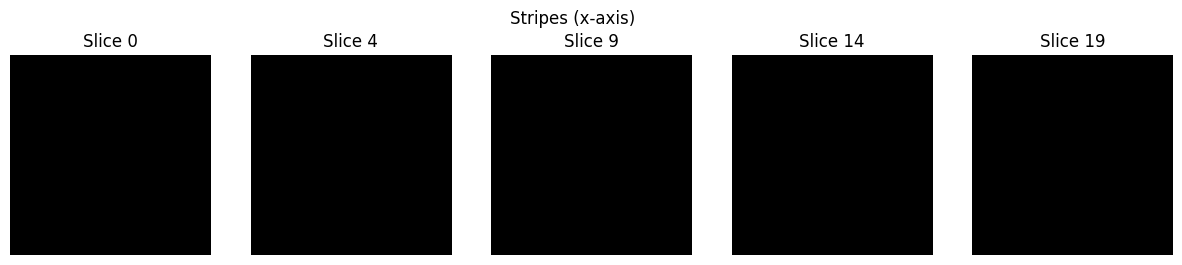

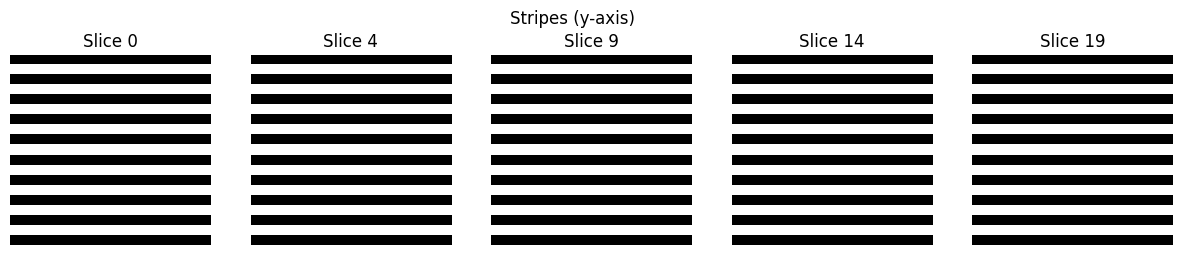

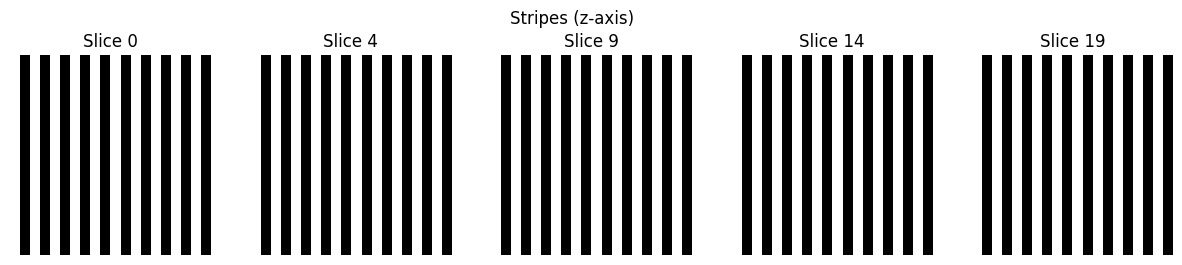

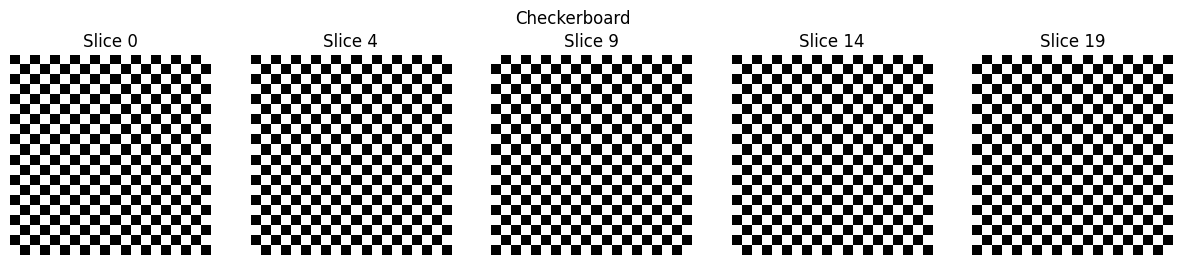

In [5]:
# Visualize the patterns
visualize_voxel_slices(stripes_x, title="Stripes (x-axis)")
visualize_voxel_slices(stripes_y, title="Stripes (y-axis)")
visualize_voxel_slices(stripes_z, title="Stripes (z-axis)")
visualize_voxel_slices(checkerboard, title="Checkerboard")

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Function to visualize 3D filled voxels
def visualize_voxels_matplotlib(data, title="3D Filled Voxels"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D grid
    x, y, z = np.indices(data.shape)
    
    # Plot voxels where data == 1
    ax.voxels(data, facecolors='gray', edgecolor='k', alpha=0.5)

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title(title)
    plt.show()



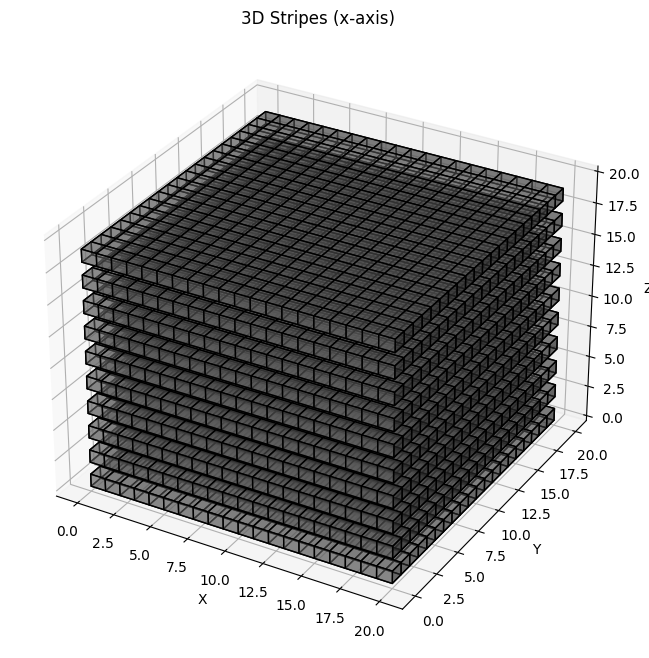

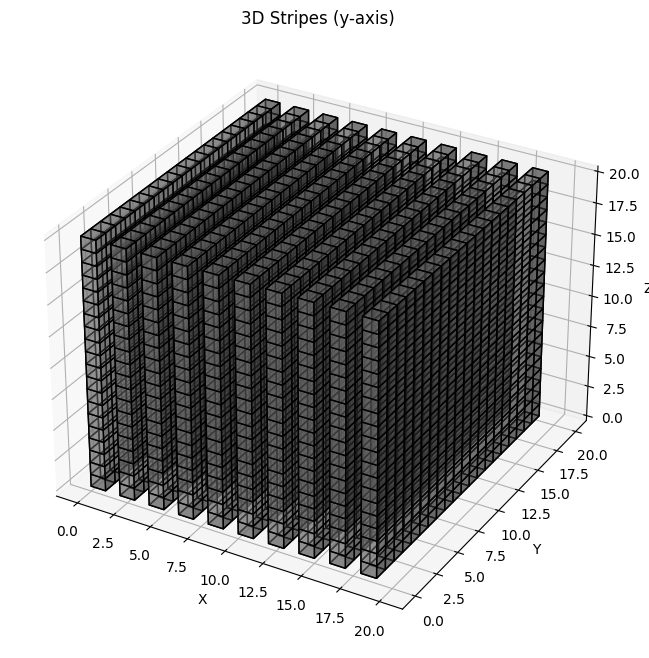

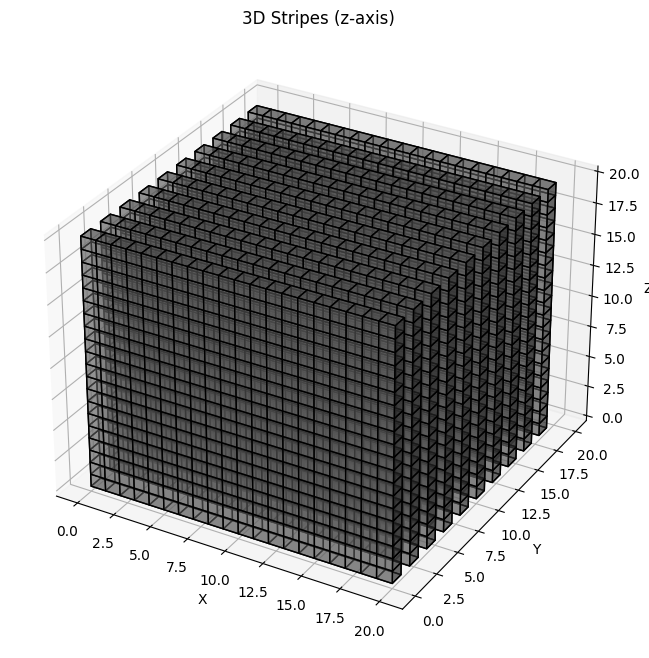

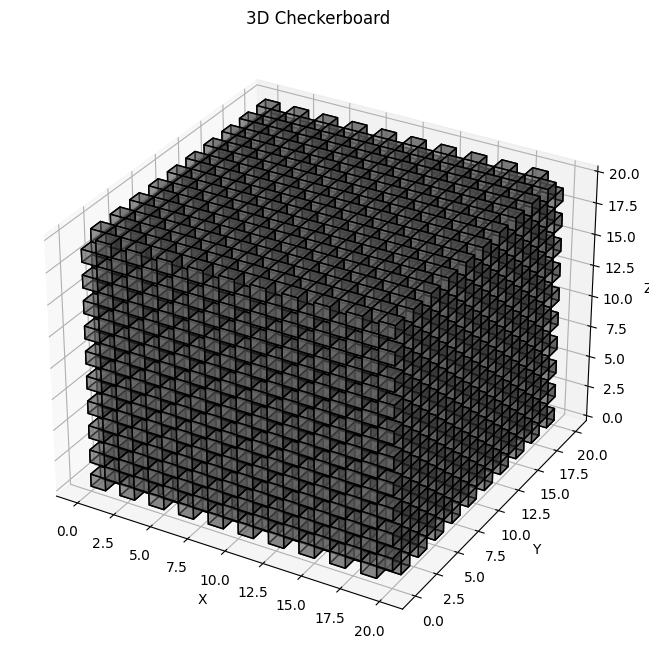

In [7]:
# Transpose data to match visual in 3D
stripes_x_transposed = np.transpose(stripes_x, (1, 2, 0))
stripes_y_transposed = np.transpose(stripes_y, (1, 2, 0))
stripes_z_transposed = np.transpose(stripes_z, (1, 2, 0))

# Visualize filled voxels
visualize_voxels_matplotlib(stripes_x_transposed, title="3D Stripes (x-axis)")
visualize_voxels_matplotlib(stripes_y_transposed, title="3D Stripes (y-axis)")
visualize_voxels_matplotlib(stripes_z_transposed, title="3D Stripes (z-axis)")
visualize_voxels_matplotlib(checkerboard, title="3D Checkerboard")